In [109]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import matplotlib.patches as patches

In [110]:
original_gene_data = pd.read_csv('data/study_1/expression_data.csv')
original_gene_data.head()

Gene_Name  CGGA_1001  CGGA_1006  CGGA_1007  CGGA_1011  CGGA_1015  CGGA_1019  \
0      A1BG      12.64       7.03      30.09       6.64       1.83      39.03   
1  A1BG-AS1       2.12       1.13       6.64       4.32       1.39       4.46   
2       A2M     452.92     106.54     206.70     707.17     824.32     155.14   
3   A2M-AS1       3.30       0.13       0.63       1.61       1.34       3.08   
4     A2ML1       0.04       0.33       4.96       1.59       0.00       0.10   

   CGGA_1022  CGGA_1023  CGGA_1024  ...  CGGA_1246  CGGA_1275  CGGA_1450  \
0      12.96       9.28       2.35  ...       4.46      28.42      19.32   
1       3.25       1.90       1.22  ...       1.57       8.36       2.21   
2     538.33      26.39     219.35  ...      87.20     243.89      73.80   
3       0.72       1.96       1.48  ...       0.42       1.02       0.22   
4       0.39       2.34       0.68  ...       2.58       0.55       0.15   

   CGGA_1460  CGGA_1475  CGGA_243  CGGA_247  CGGA_738  CGGA_759  CGGA_D30  
0       2.24      18.89      4.03      5.29      4.64      7.07     31.41  
1       1.60       5.31      2.47      3.69      0.85      1.99      2.65  
2     111.50     340.53    108.06     97.24    160.70    263.66    192.54  
3       0.15       0.91      0.33      0.03      0.38      0.48      2.51  
4       1.75       0.05      1.55      0.71      3.33      0.60      3.86  

[5 rows x 326 columns]

In [111]:
test_data = pd.read_csv('test_data_processed.csv')
train_data = pd.read_csv('train_data_processed.csv')
test_lbl = pd.DataFrame(np.load('test_labels.csv.npy', allow_pickle = True))
train_lbl = pd.DataFrame(np.load('train_labels.csv.npy', allow_pickle = True))

In [112]:
all_gene_names = list(original_gene_data['Gene_Name'])
genes_selected = [all_gene_names[int(x)] for x in train_data.columns]

In [113]:
train_data.columns = genes_selected
test_data.columns = genes_selected

In [114]:
train_data_lbl = pd.concat([train_data, train_lbl], axis = 1)
test_data_lbl = pd.concat([test_data, test_lbl], axis = 1)

train_data_lbl.columns.values[-1] = 'Grade'
test_data_lbl.columns.values[-1] = 'Grade'

processed_data = pd.concat([train_data_lbl, test_data_lbl], axis = 0)

In [115]:
processed_data = processed_data.sort_values(['Grade'])
processed_data.index = range(1, 326)

processed_data.head()

A1BG       A2M     A2ML1    A4GALT      AAK1      AATK      ABAT  \
1  4.216178  8.112087  0.743007  1.502574  1.949036  3.874457  7.081137   
2  3.492268  6.558098  1.204692  0.826887  2.568440  6.591442  7.197380   
3  4.025552  7.656036  2.207602  0.887445  1.647242  3.561085  7.740458   
4  2.327493  7.469541  1.531726  0.554627  2.442459  5.305723  6.903982   
5  4.659819  5.615786  3.985789  0.156355  1.685608  5.141938  7.282355   

   ABC7-42389800N19.1     ABCA1   ABCA17P  ...  ZSCAN12P1   ZSCAN18   ZSCAN23  \
1            4.097469  3.577228  3.369548  ...   0.059864  5.959965  0.369548   
2            4.171607  2.880995  0.609082  ...  -0.058342  6.040804  1.898589   
3            4.217317  5.076906  0.561085  ...   0.062279  6.879402  1.956570   
4            2.943153  3.971084  0.460760  ...  -0.576077  5.118611  2.081642   
5            4.261073  4.588707  0.973047  ...  -0.153330  6.593066  1.347975   

     ZSWIM4    ZSWIM5  ZSWIM8-AS1    ZWILCH     ZWINT       ZYX   Grade  
1  1.898801  0.768098    0.336381  1.596617  2.517447  5.719885  WHO II  
2  1.503810  2.236170   -0.317986  1.079161  2.036092  5.255501  WHO II  
3  1.006323  1.588566    0.492914  1.439584  1.939597  5.635432  WHO II  
4  2.398832  1.448585   -0.130277  1.454685  2.451638  4.958259  WHO II  
5  1.696923  1.881798   -0.470187  1.164529  1.114776  5.501457  WHO II  

[5 rows x 8676 columns]

In [116]:
# Calculate the mean and std for plotting
means = processed_data.groupby(['Grade']).mean()
std = processed_data.groupby(['Grade']).std()

# Analyze Important Genes from Supervised Methods

In [117]:
important_genes = ['AC007551.3',
'AC009950.2',
'APOC1P1',
'ARL4A',
'ARL4D',
'C5orf63',
'CA8',
'CABP7',
'CASP4',
'CDC42EP4',
'CES4A',
'CIB2',
'CRYBB2P1',
'CTA-253N17.1',
'CTU1',
'DDX11L2',
'DHX40P1',
'ETNK2',
'FKBP5',
'GPR146',
'GS1-259H13.2',
'GSTT2B',
'IFI27',
'IGLV5-52',
'KANSL1L',
'KDM5D',
'LA16c-380A1.1',
'LECT1',
'MEIS2',
'MT-ATP8',
'MYO5BP2',
'NDRG1',
'NOS2',
'NR4A1',
'NRG1',
'NSUN5P2',
'NXN',
'OSBP2',
'PCDHGA9',
'PIK3C2B',
'PIPOX',
'PLXNA4',
'RNF207',
'RNVU1-7',
'RP1-37N7.3',
'RP11-108M9.4',
'RP11-108P20.1',
'RP11-222A11.1',
'RP11-329B9.5',
'RP11-395G23.3',
'RP11-3B12.1',
'RP11-449P15.2',
'RP11-488L18.10',
'RP11-572P18.1',
'RP11-672L10.6',
'RP11-730A19.9',
'RP11-797A18.6',
'RP11-844P9.2',
'RP11-967K21.1',
'RP11-96H19.1',
'RP11-977G19.12',
'RP3-430N8.10',
'RP4-669L17.8',
'RP4-734P14.4',
'RP4-781K5.2',
'RPL36A-HNRNPH2',
'RPPH1',
'RPS17L',
'RPSAP41',
'SBF2-AS1',
'SETD9',
'SHC4',
'SLC38A11',
'SLC4A11',
'SLIT2',
'SNORA59B',
'SNORD17',
'SPCS2P4',
'SVEP1',
'TAF4B',
'TECRP1',
'TLE1',
'TNKS2-AS1',
'TOLLIP-AS1',
'TXLNG2P',
'ZBTB16',
'ZFY',
'ZNF229',
'ZNF469']

# Plot the different genes by grade

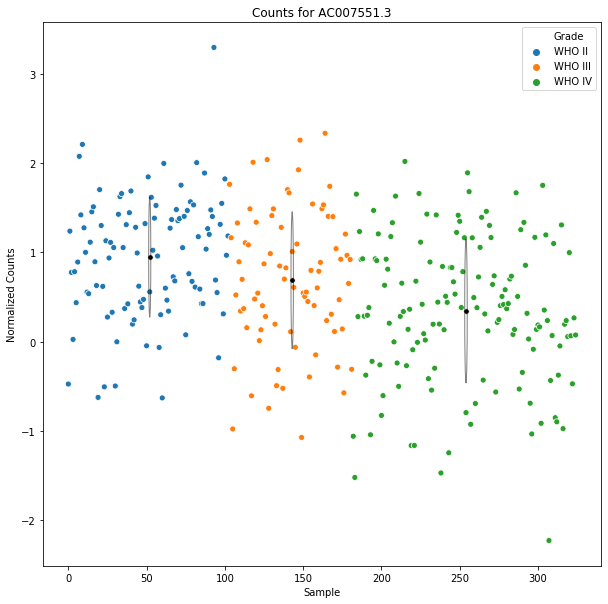

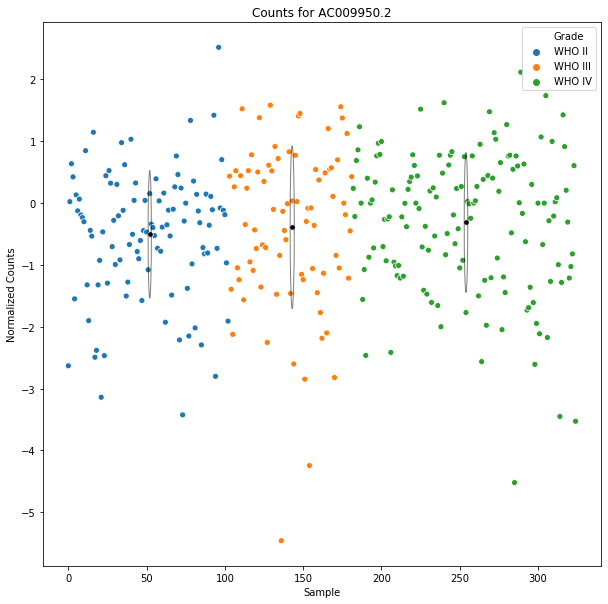

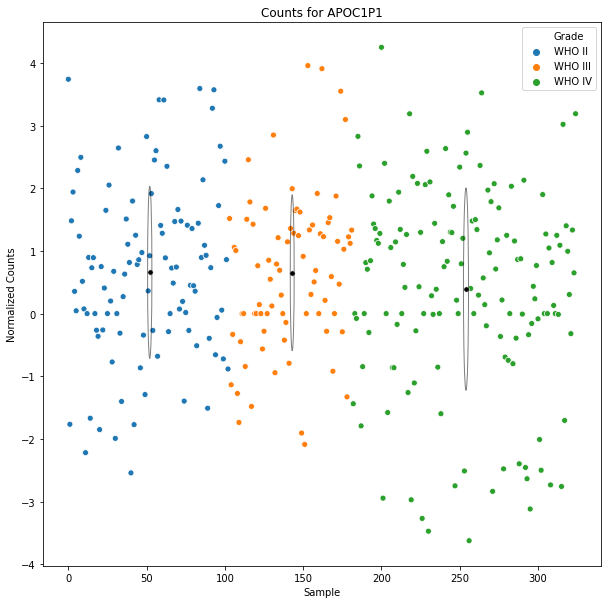

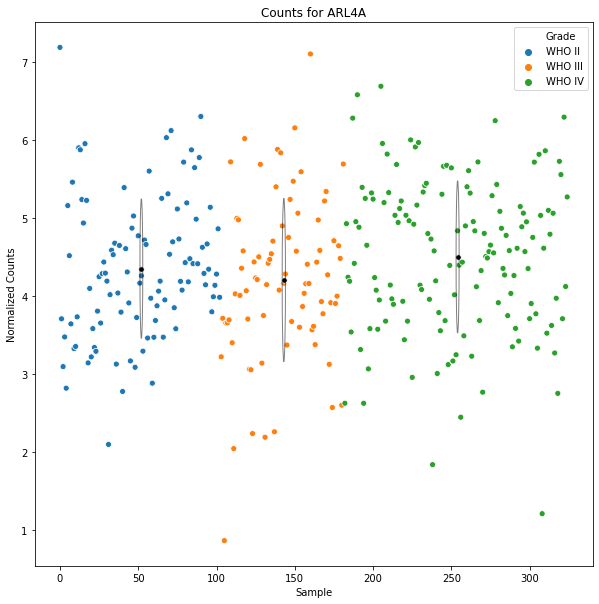

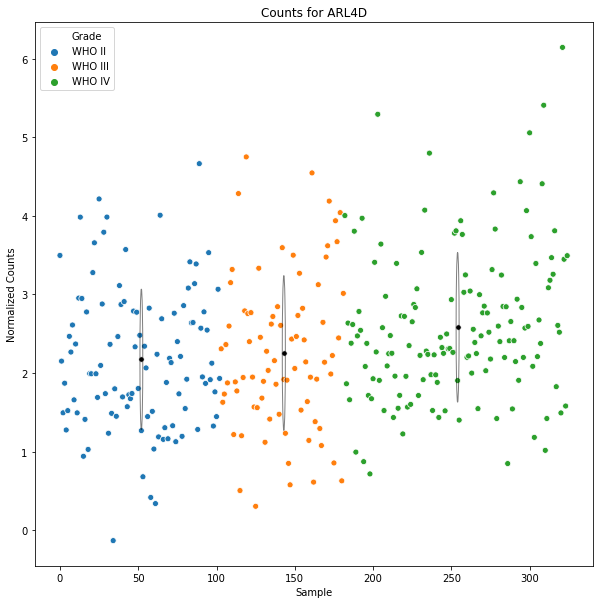

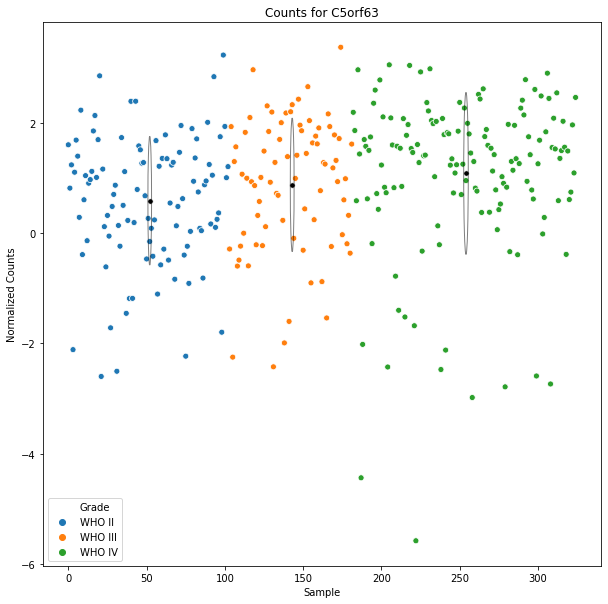

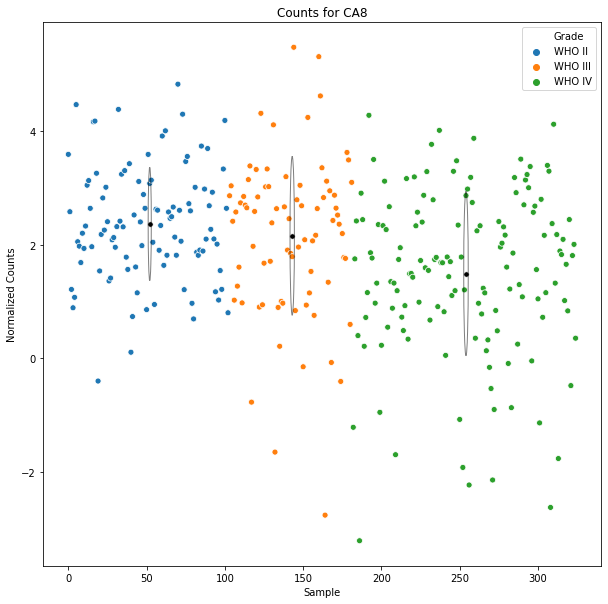

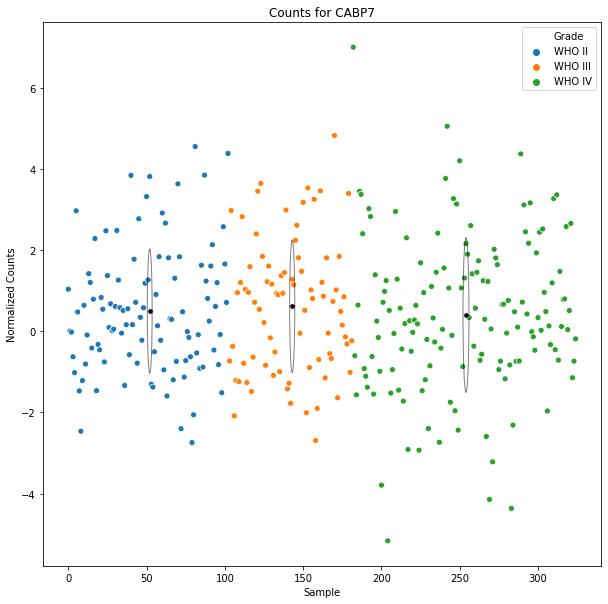

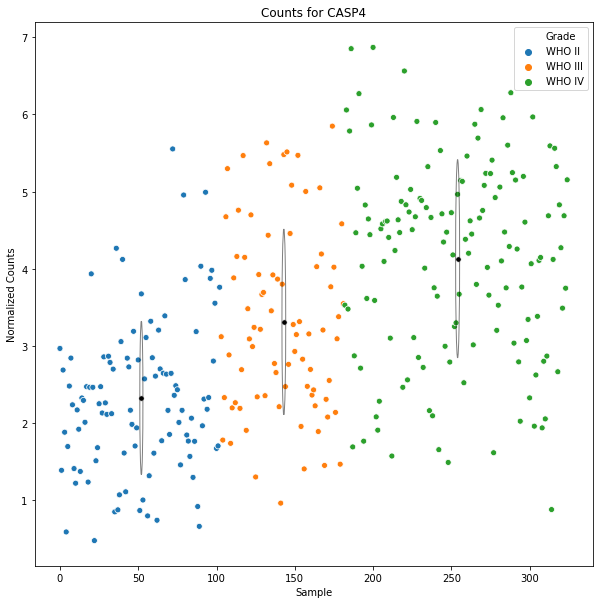

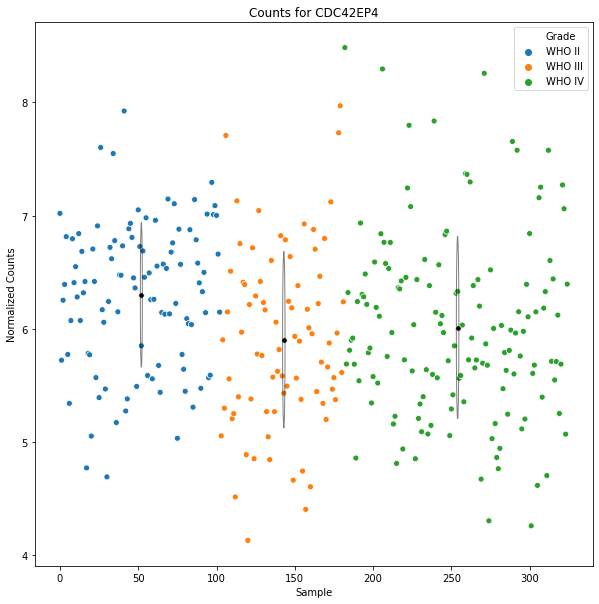

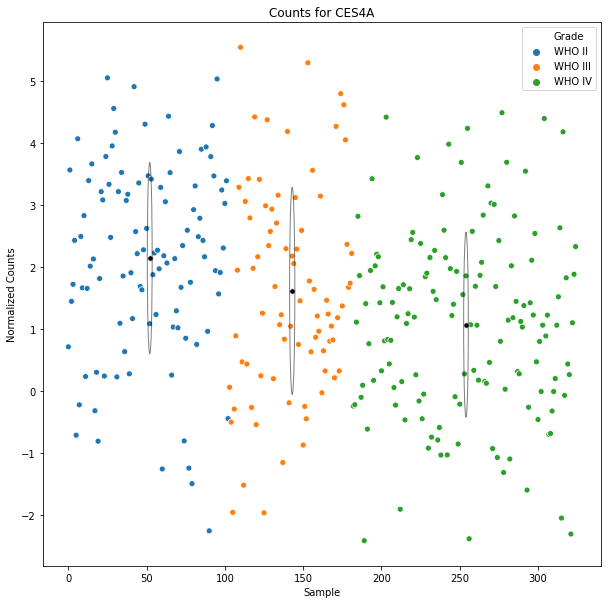

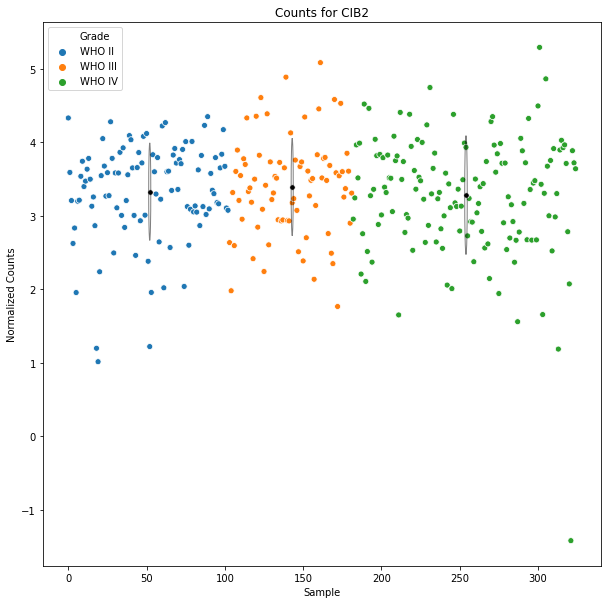

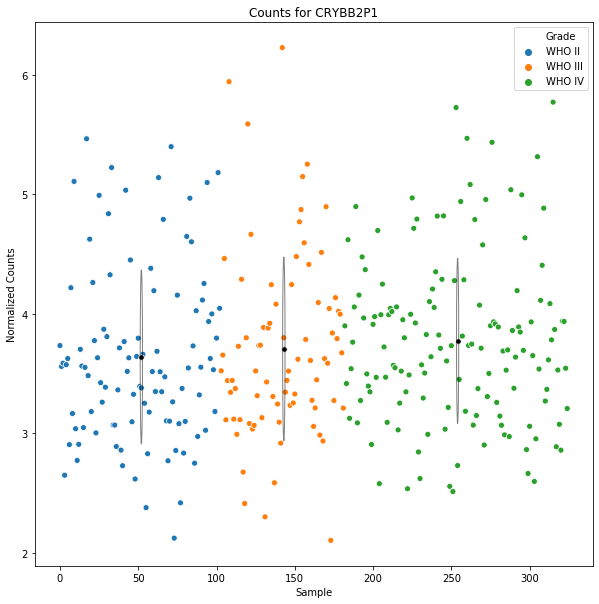

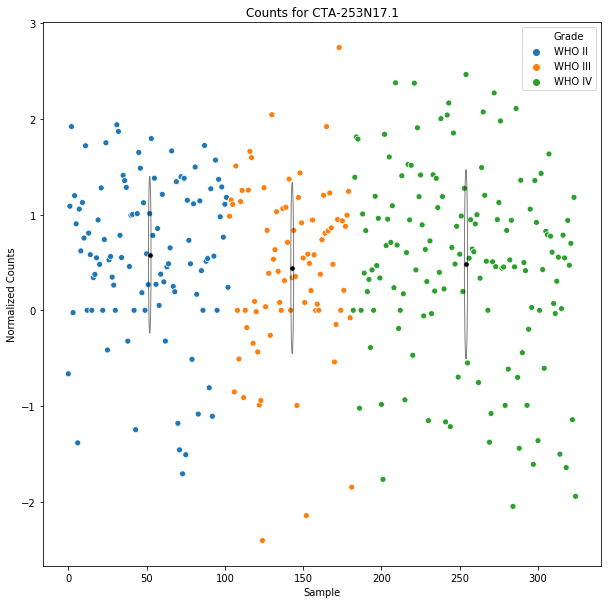

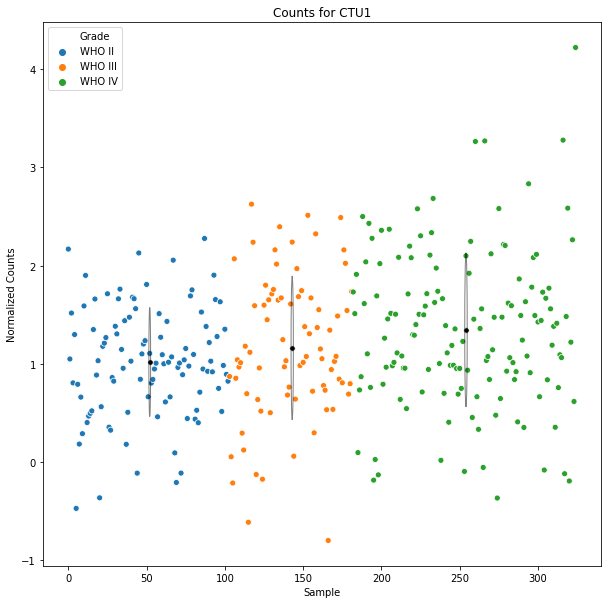

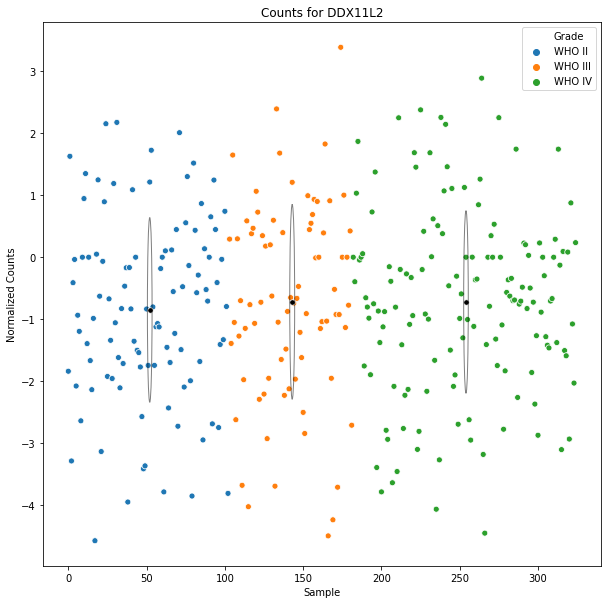

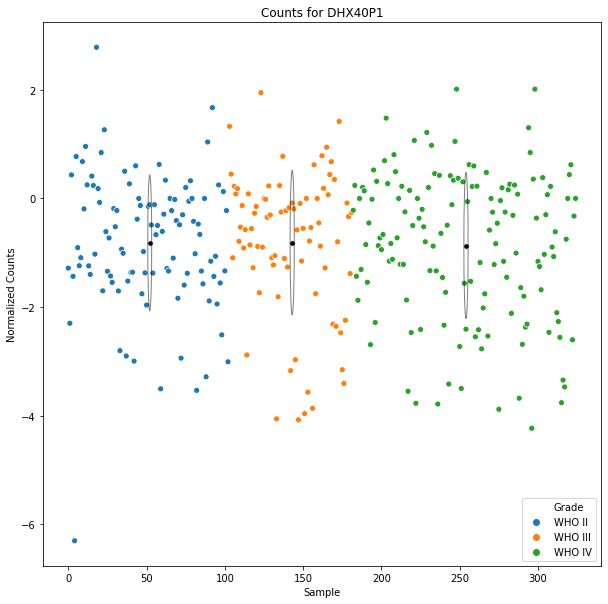

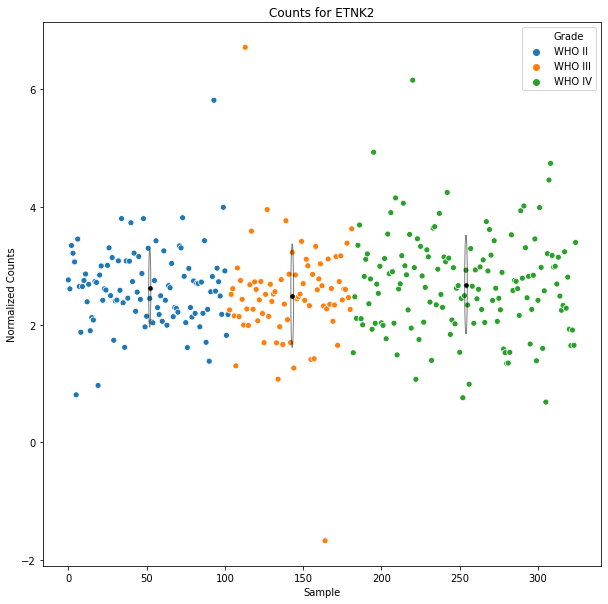

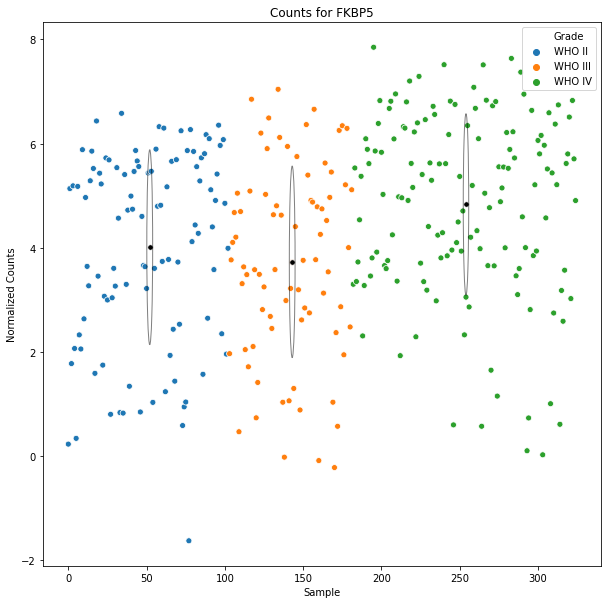

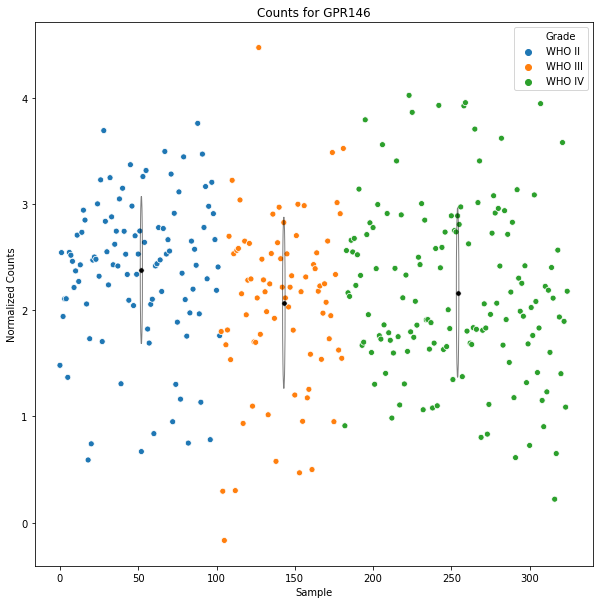

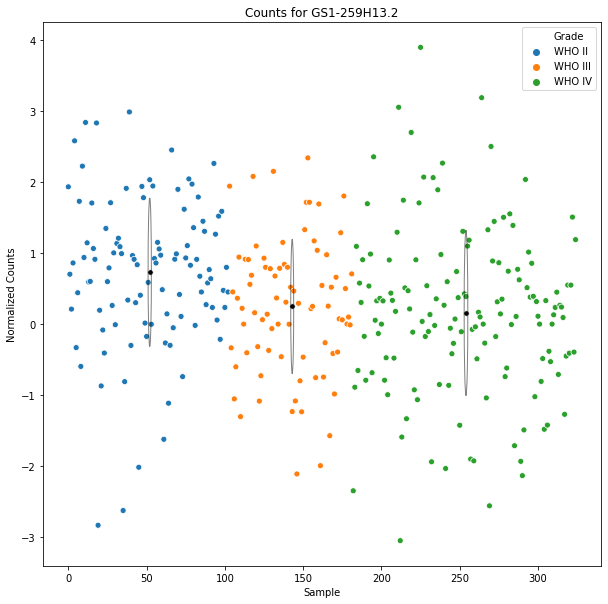

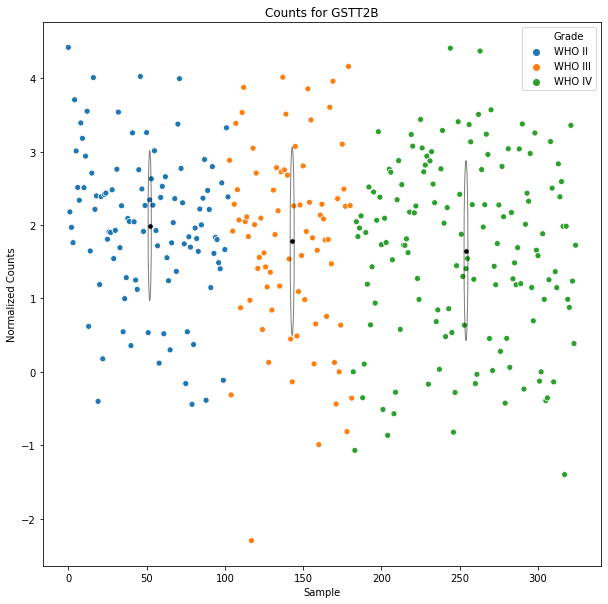

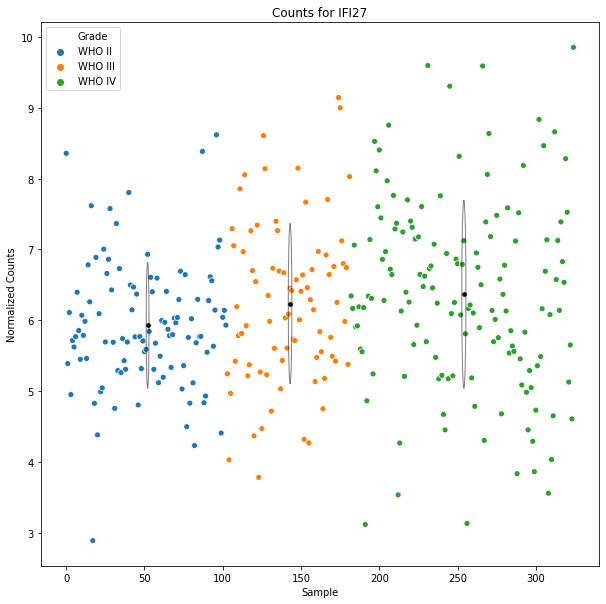

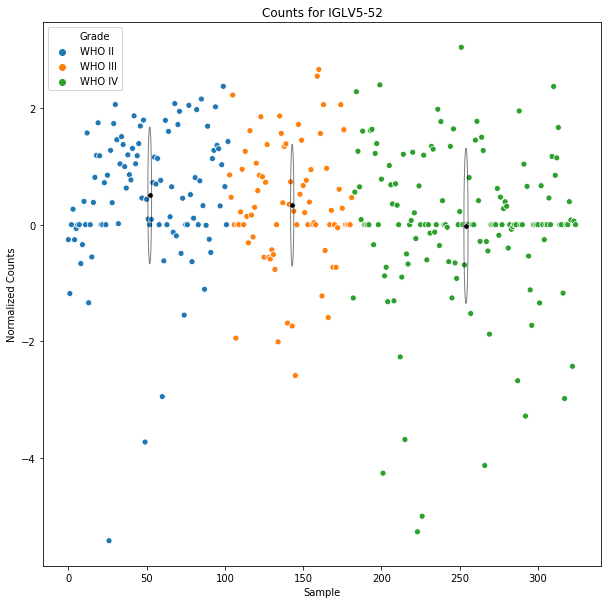

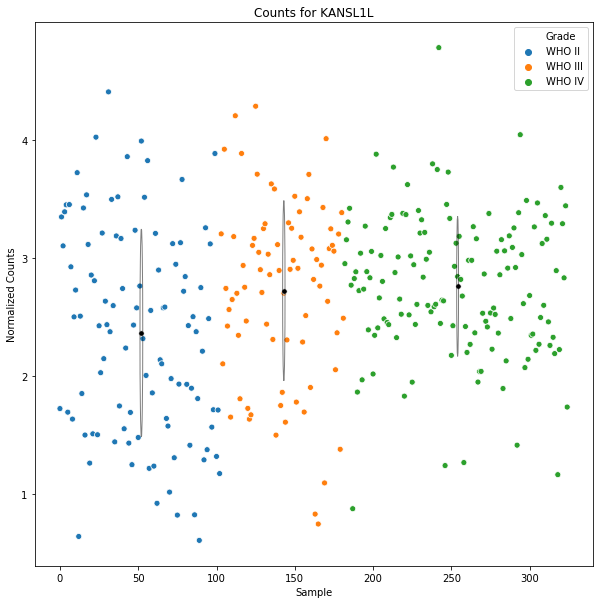

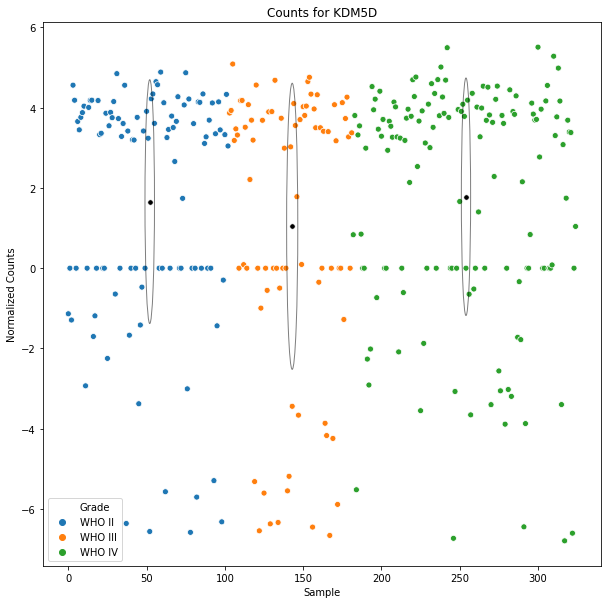

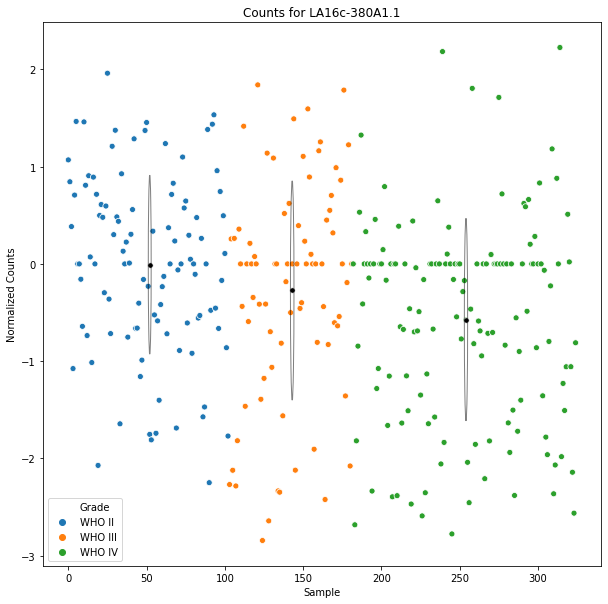

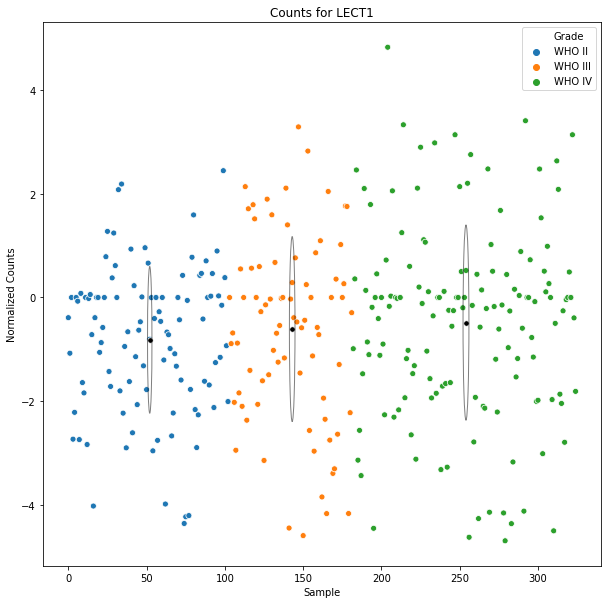

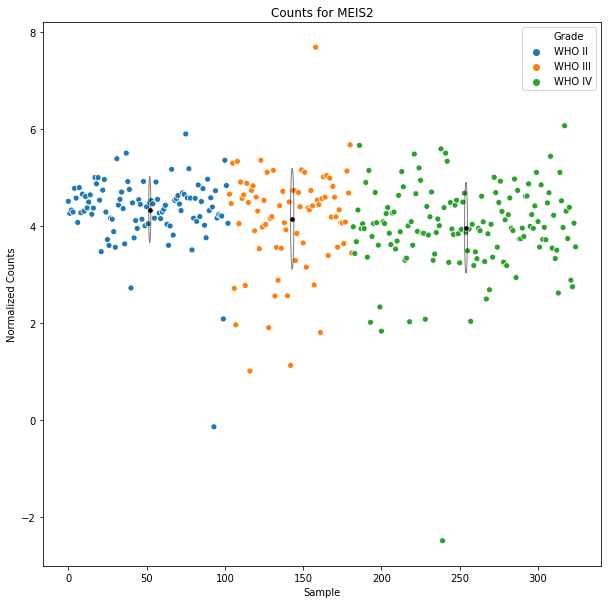

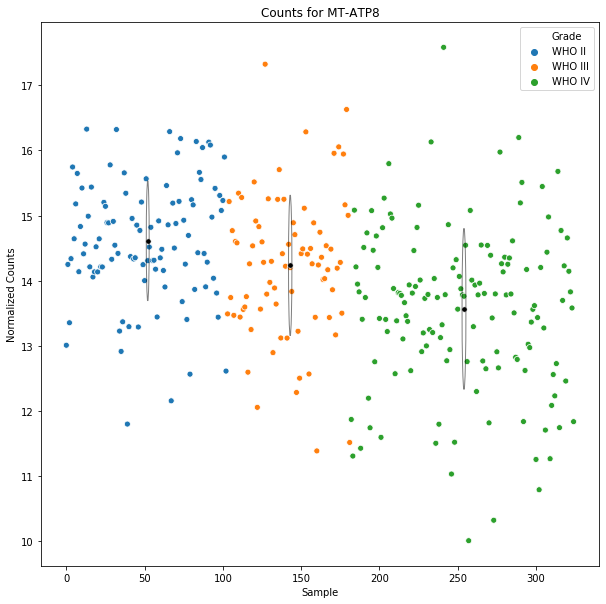

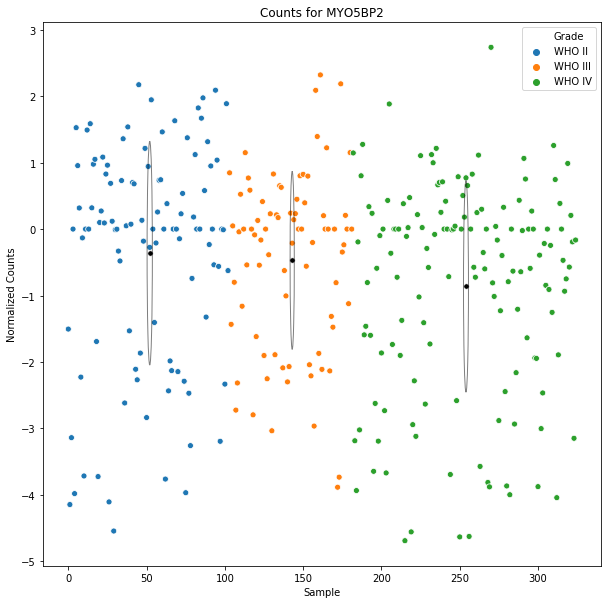

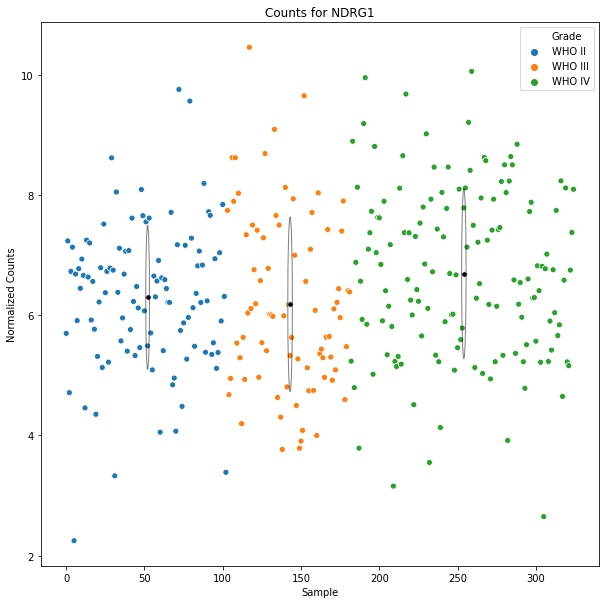

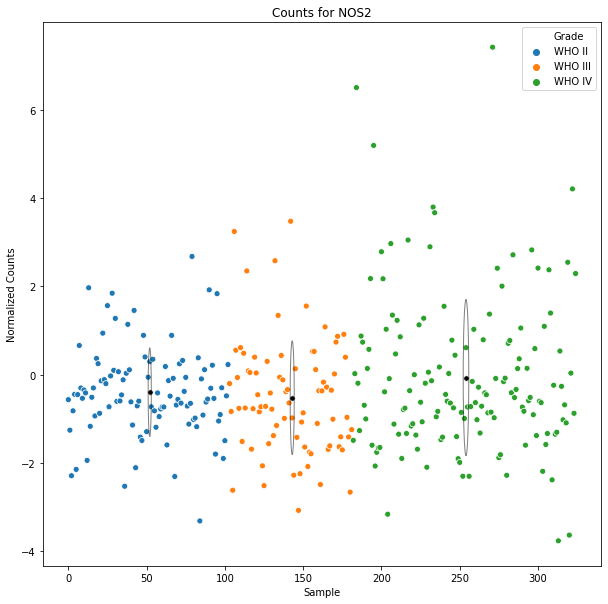

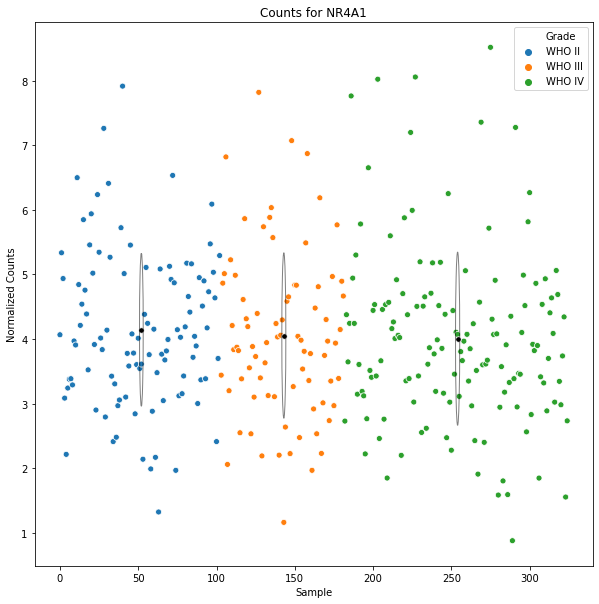

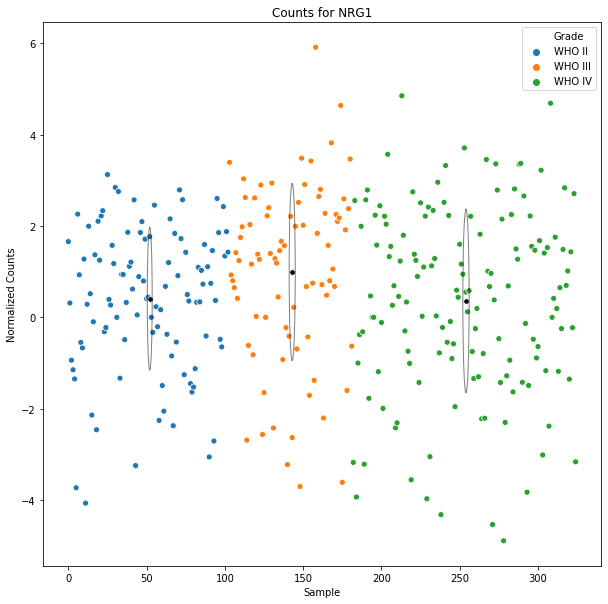

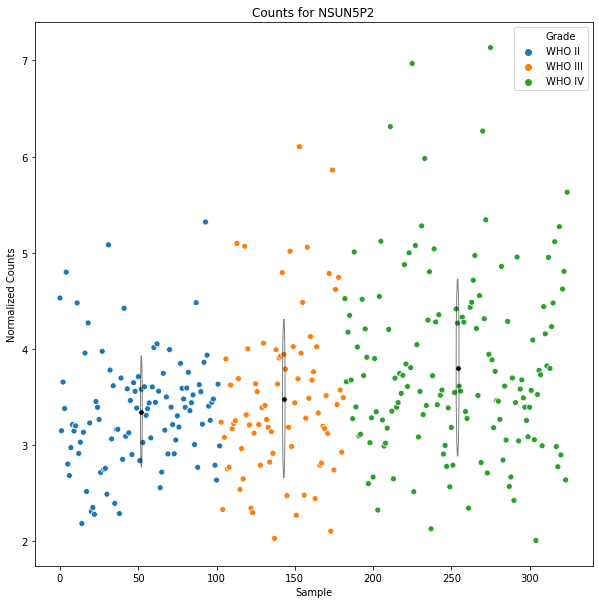

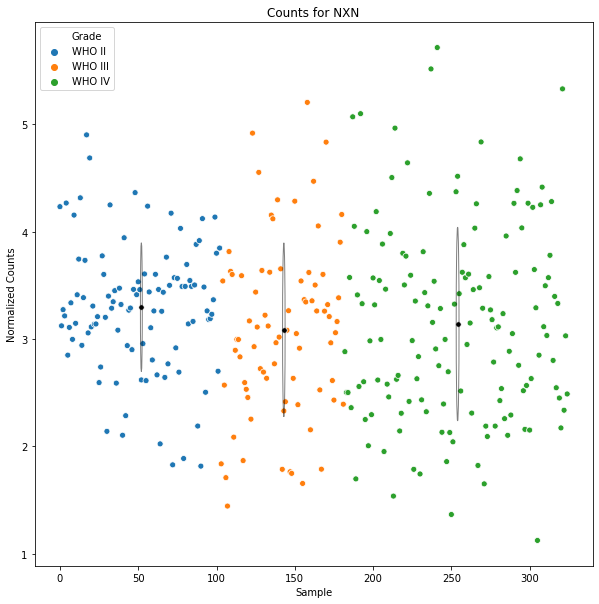

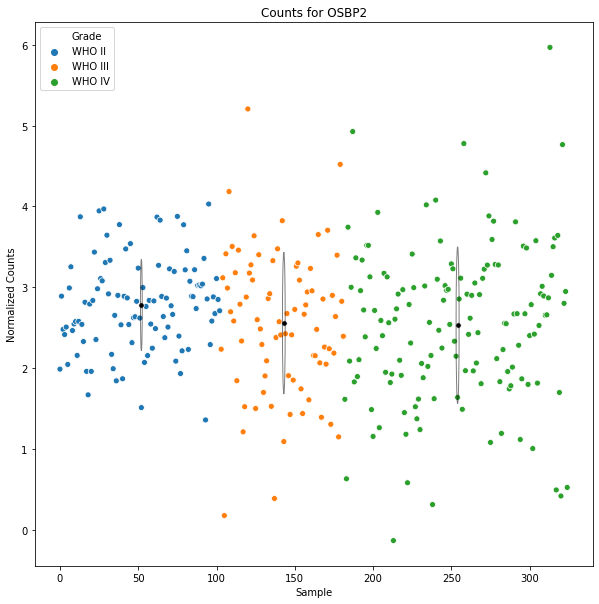

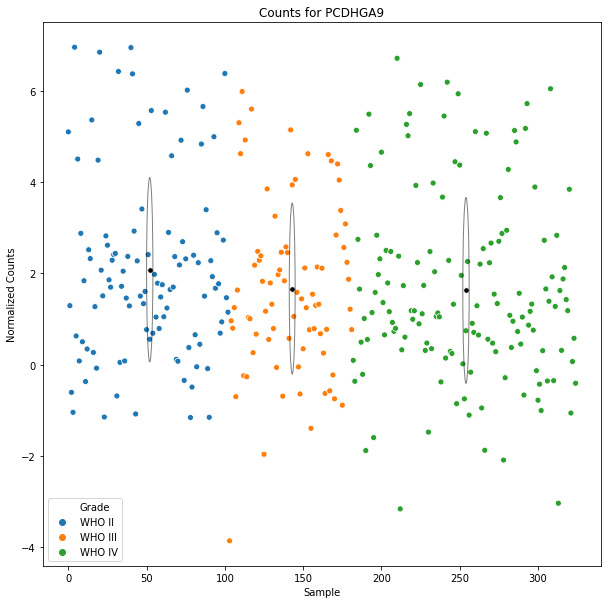

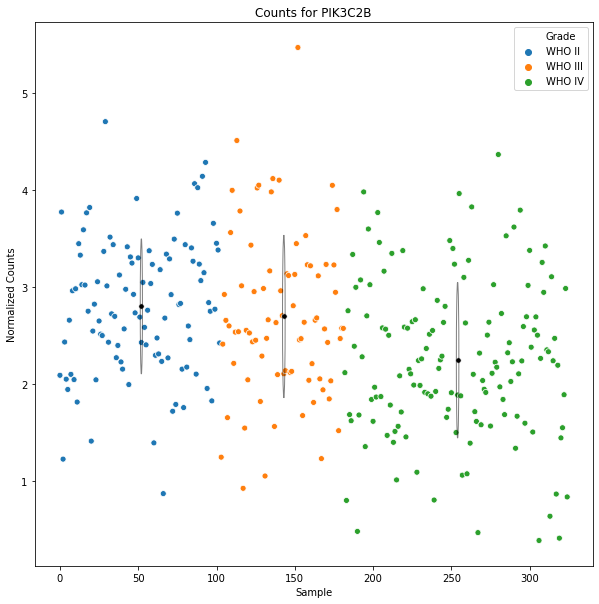

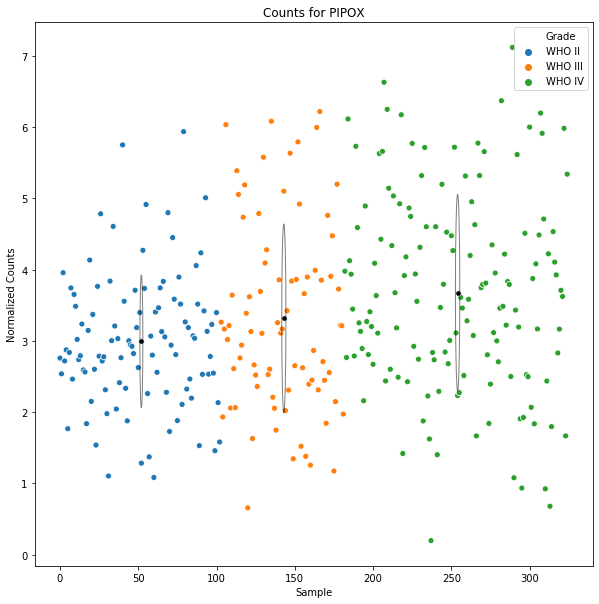

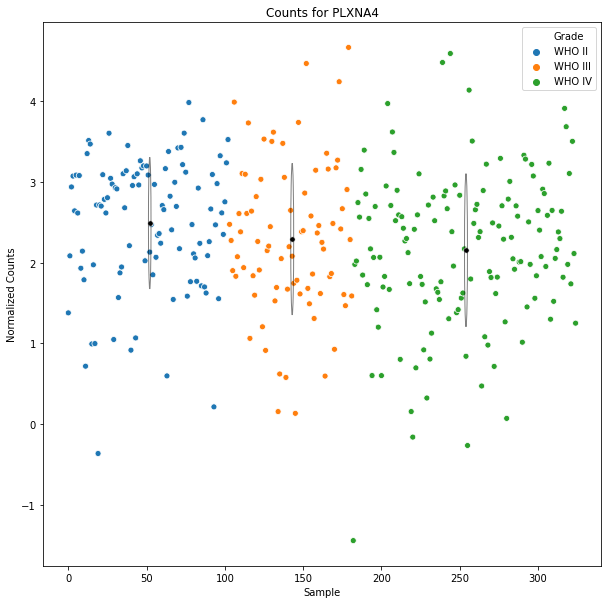

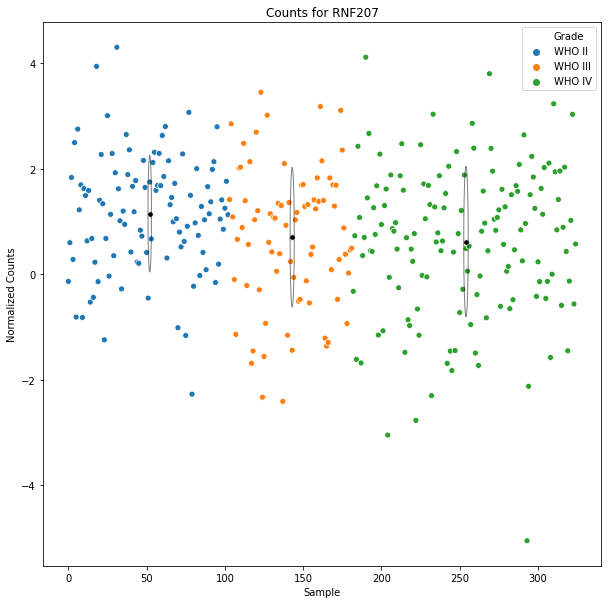

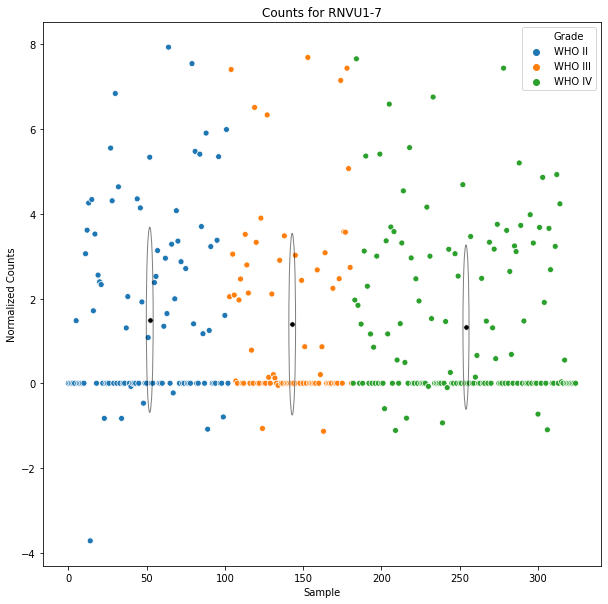

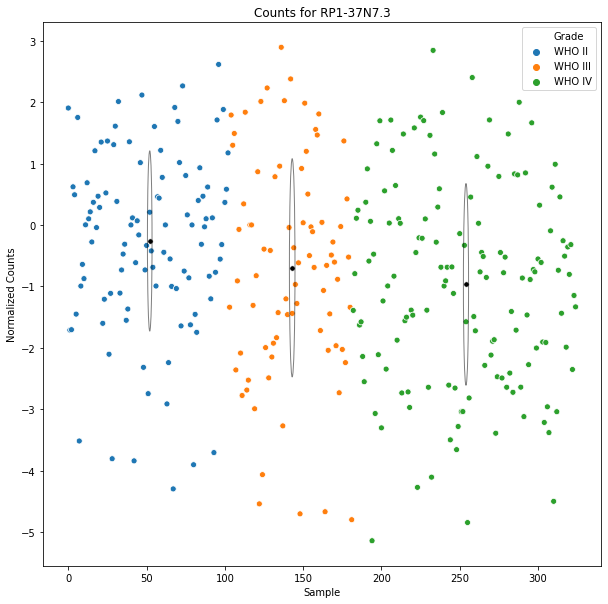

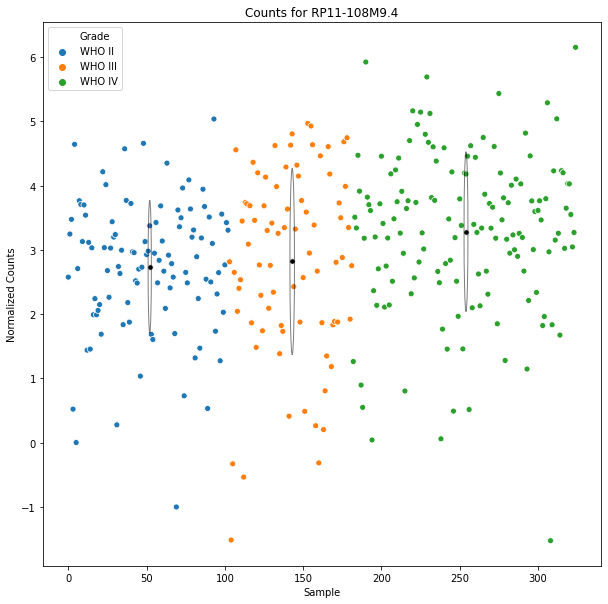

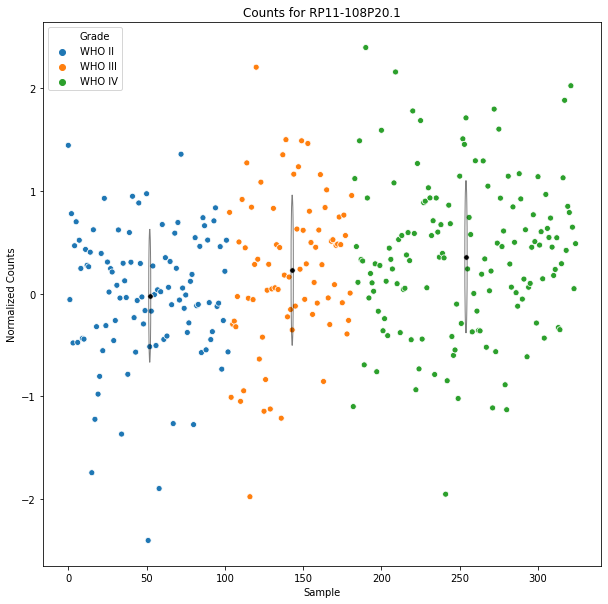

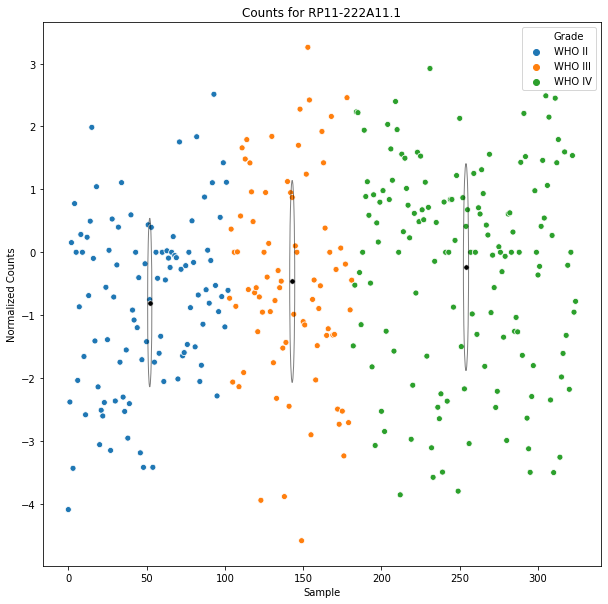

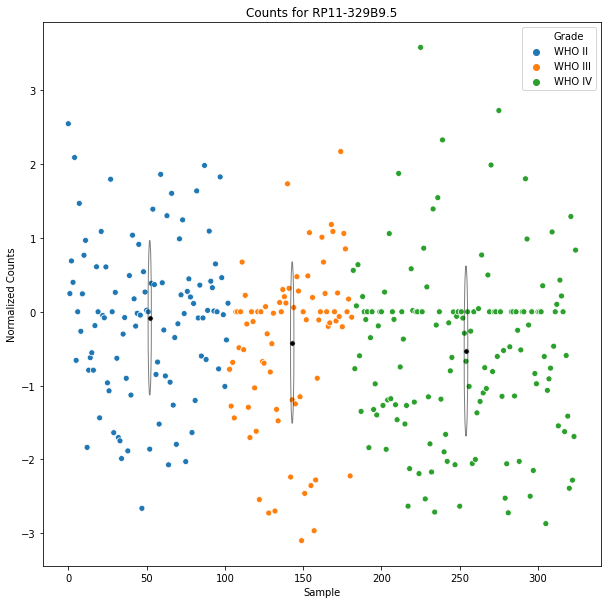

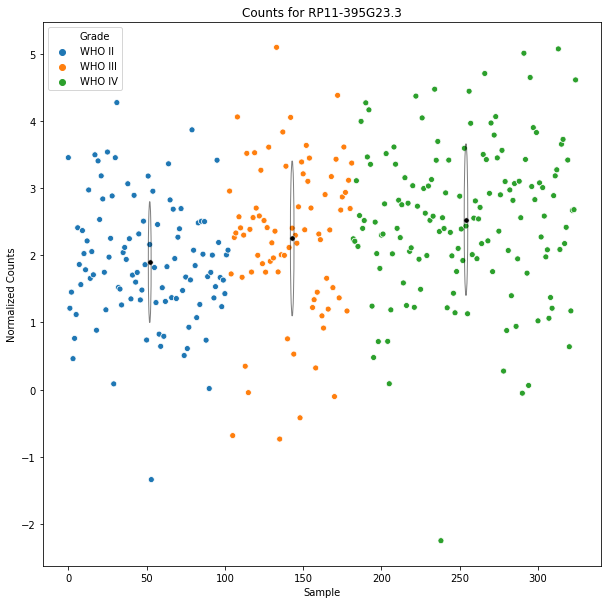

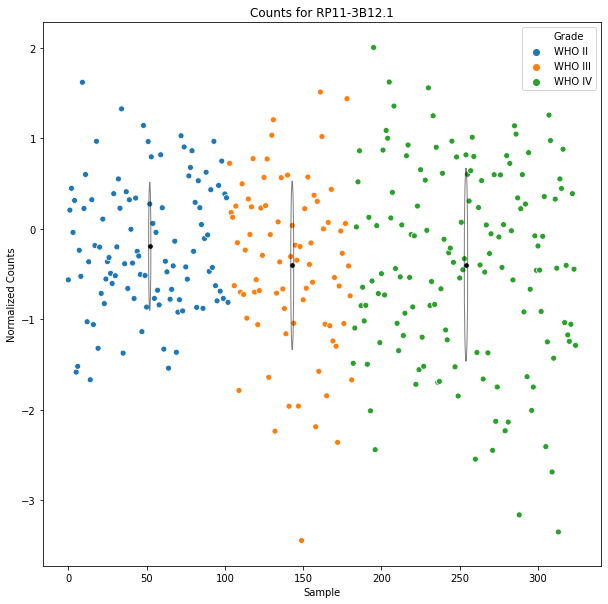

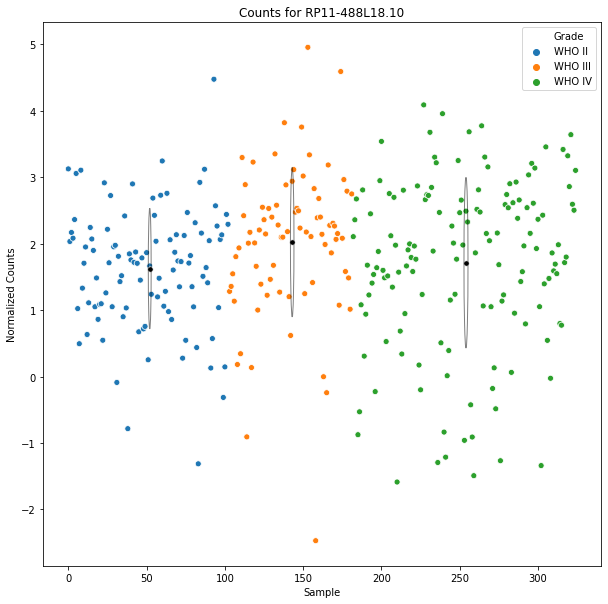

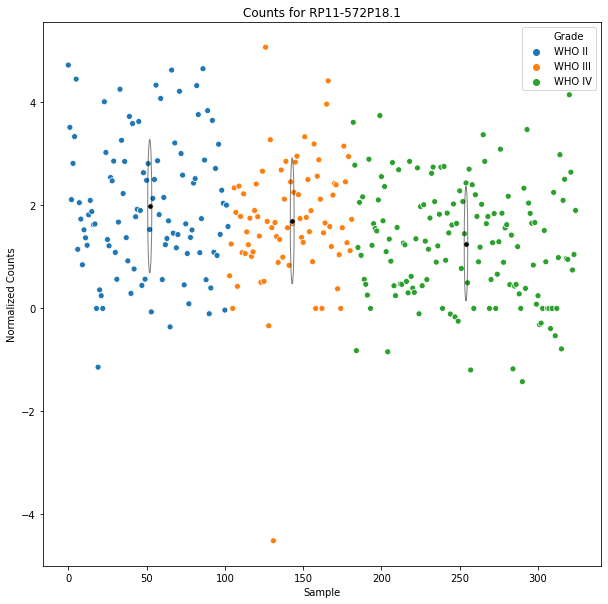

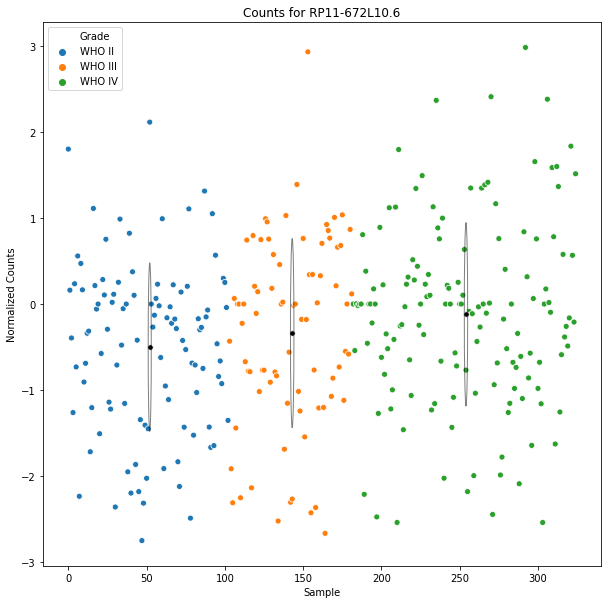

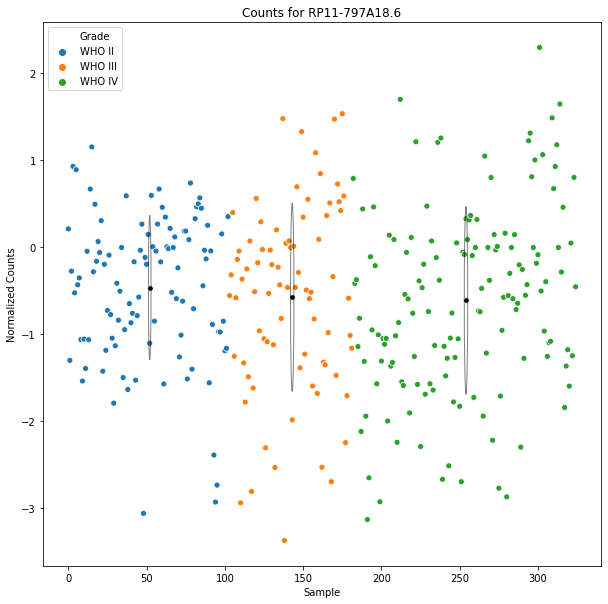

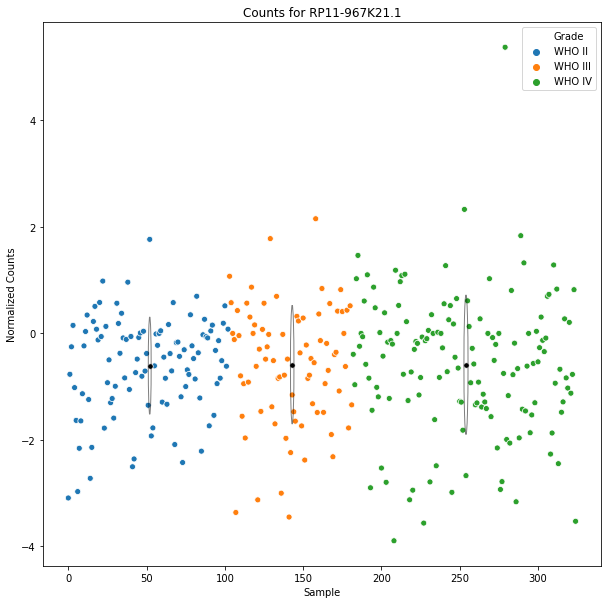

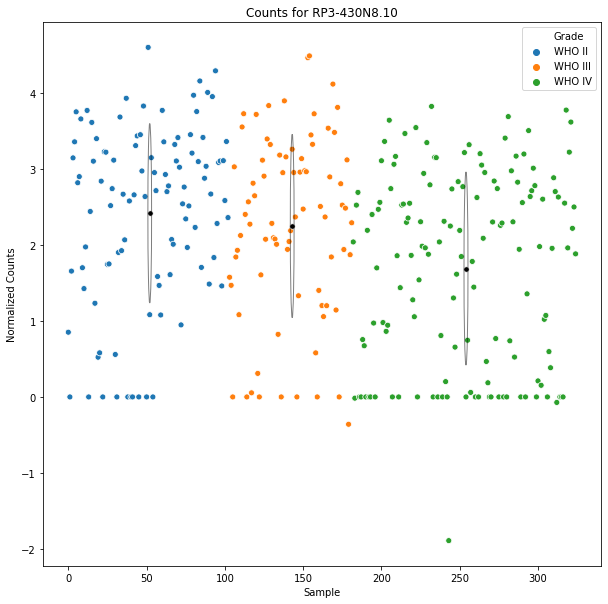

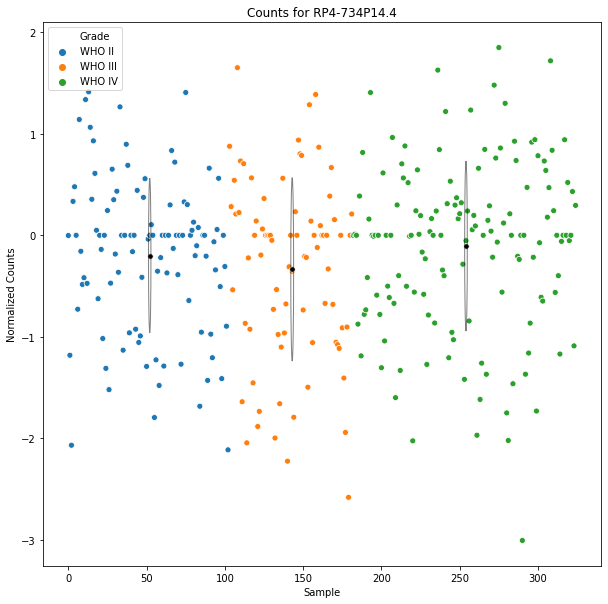

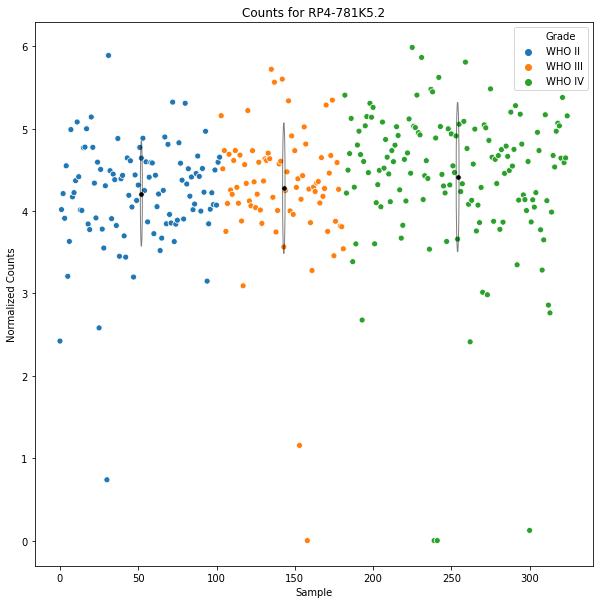

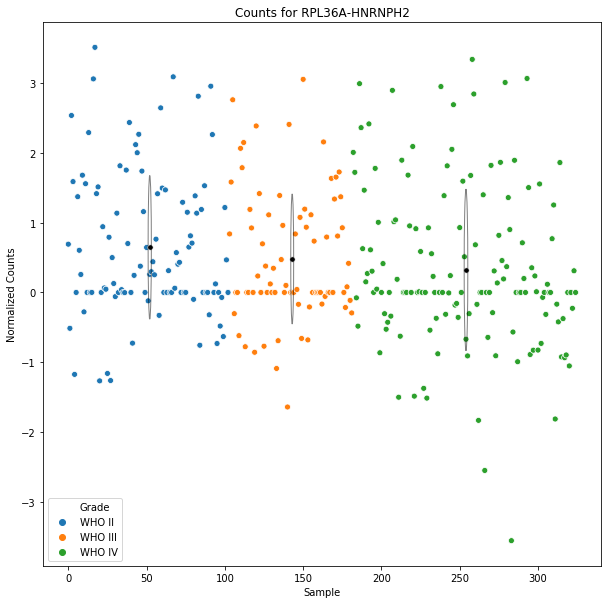

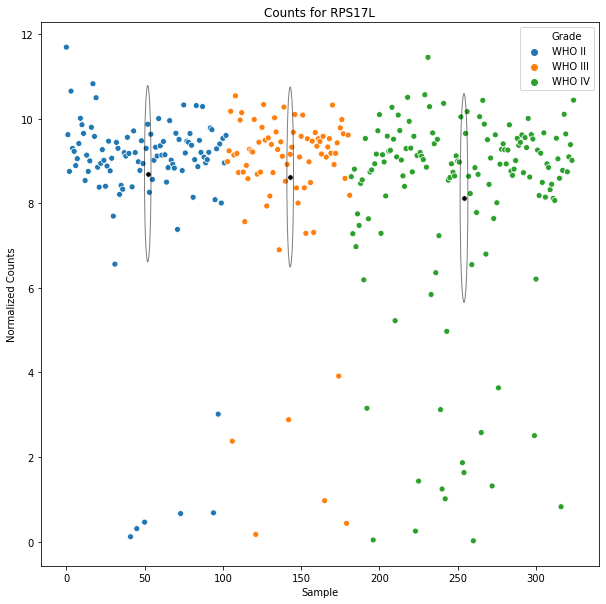

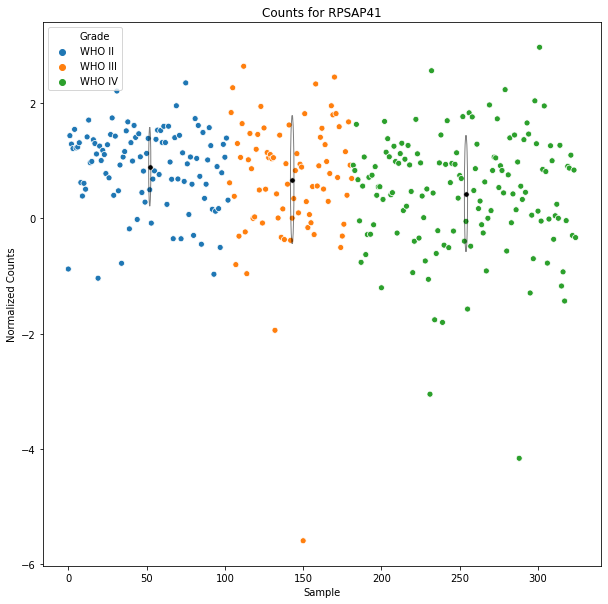

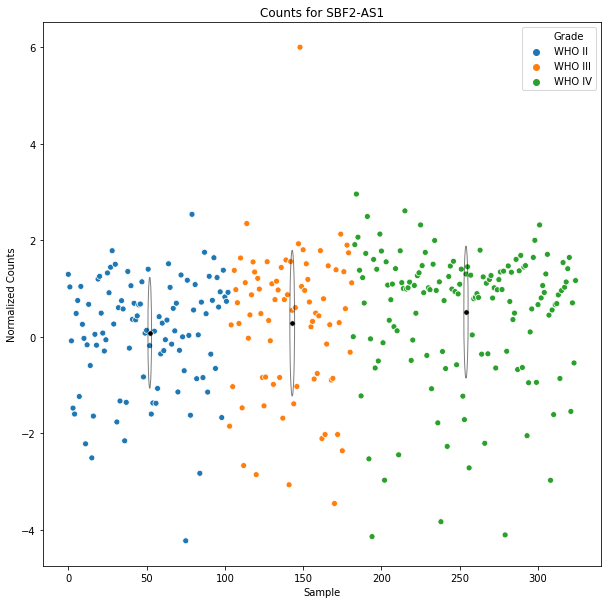

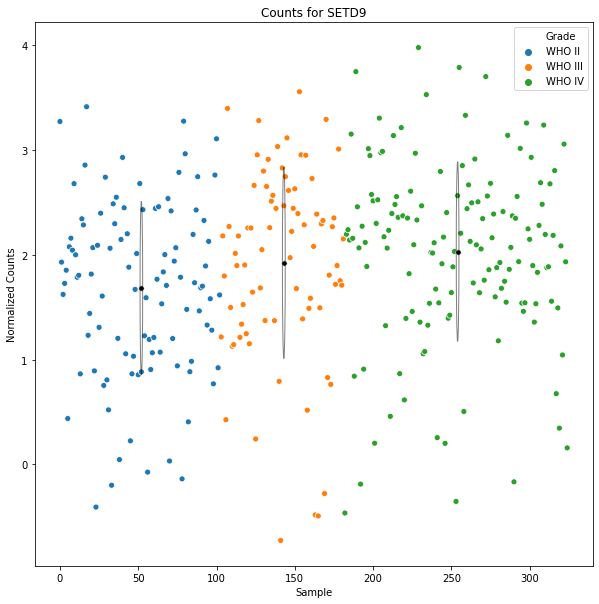

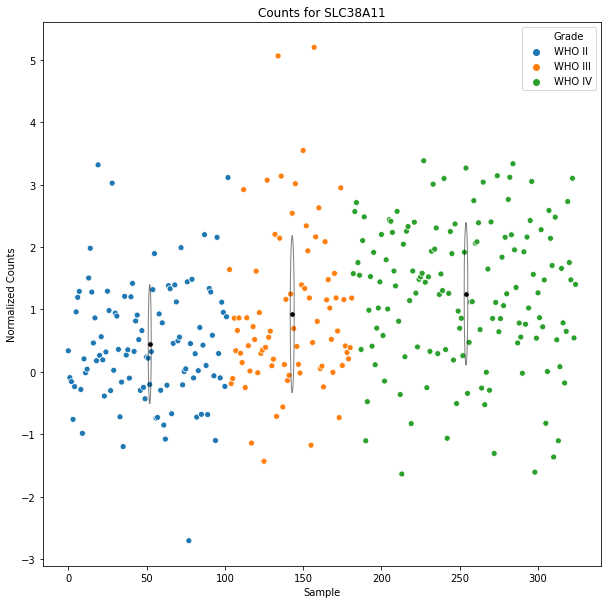

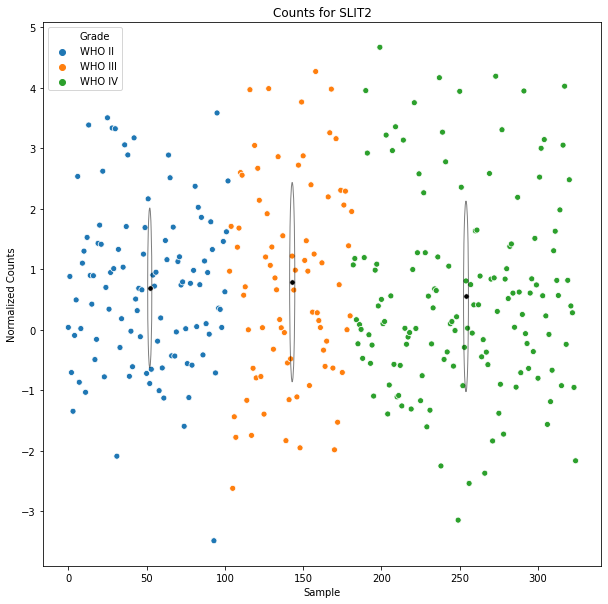

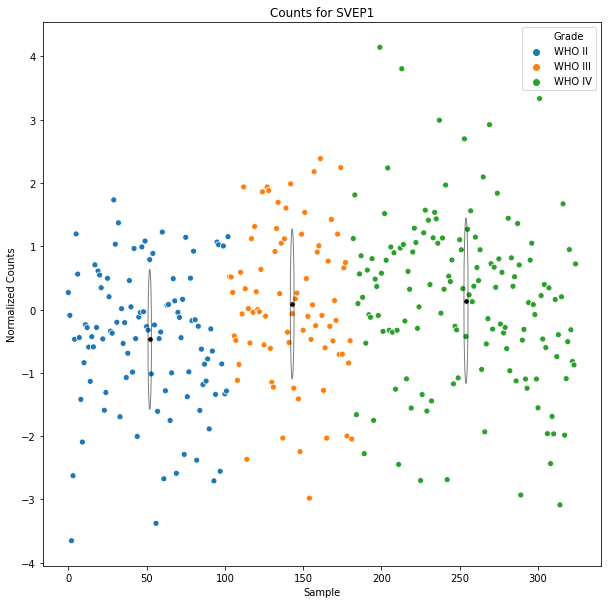

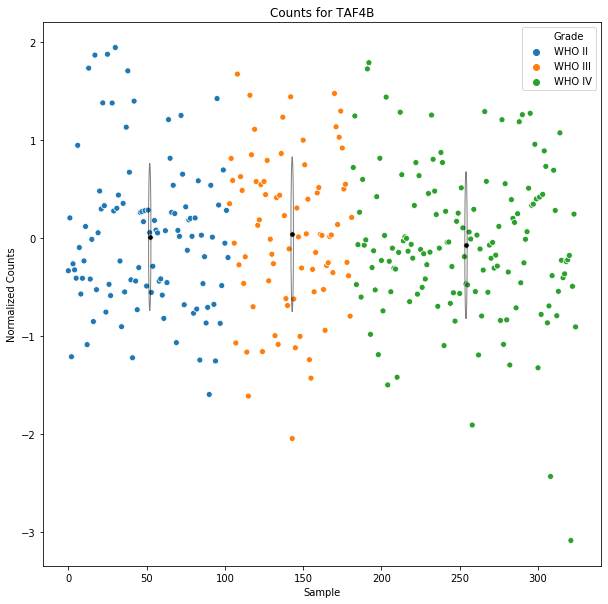

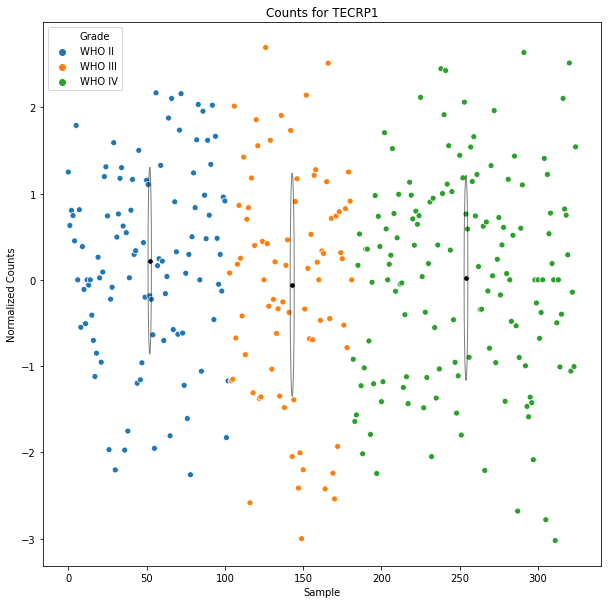

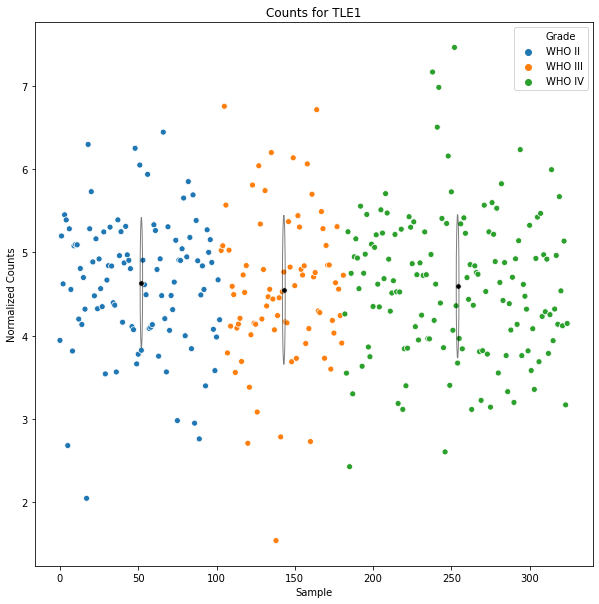

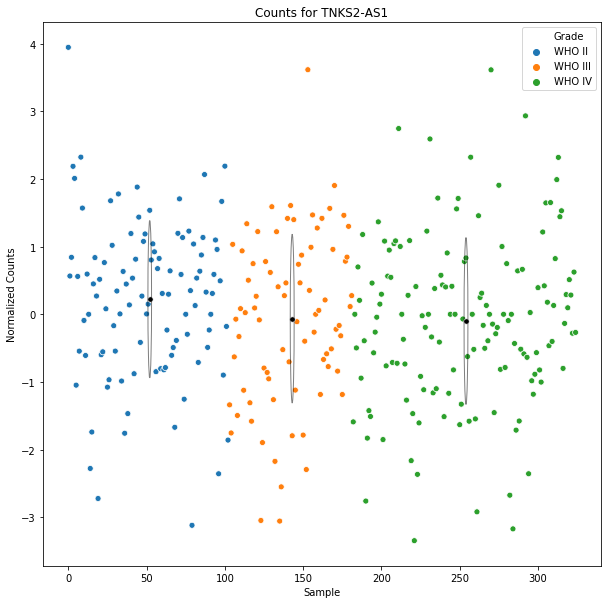

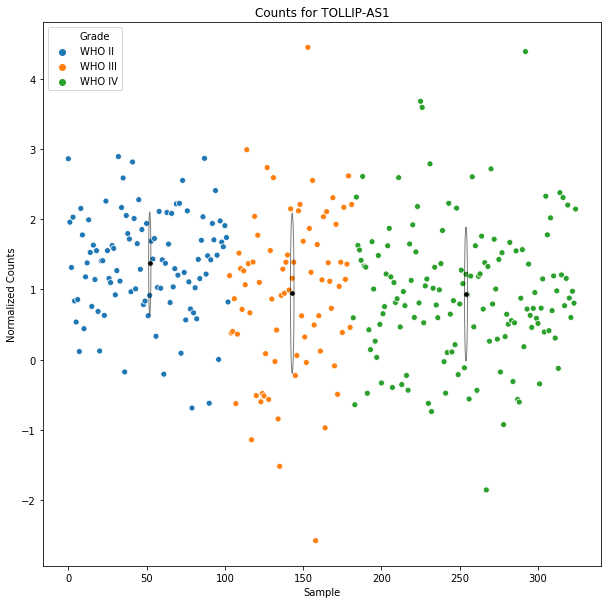

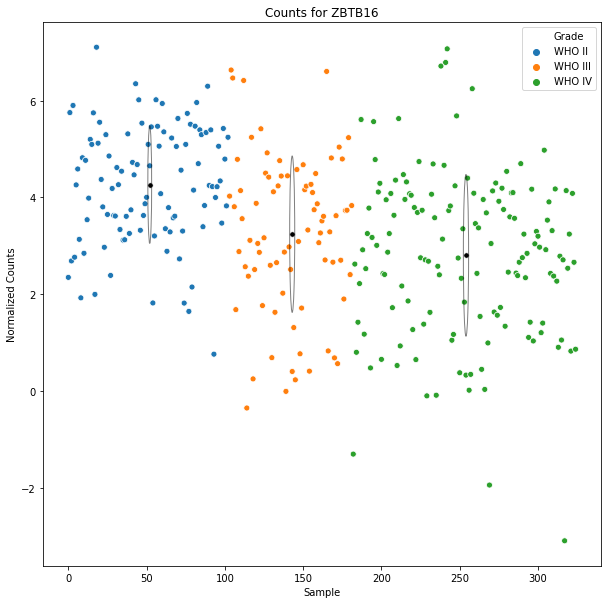

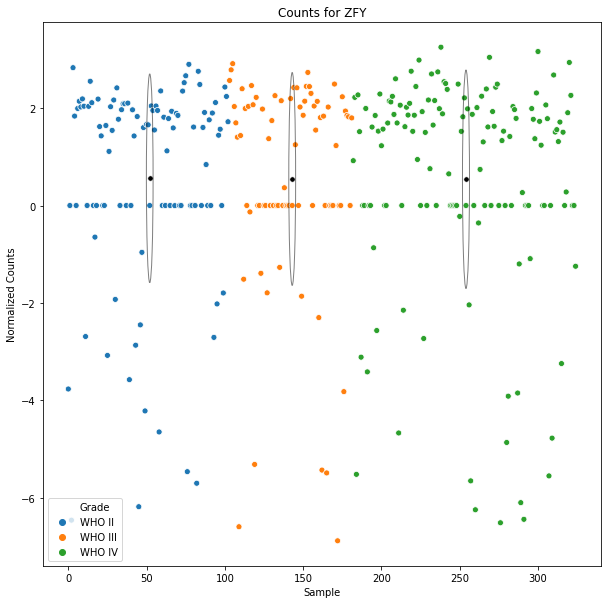

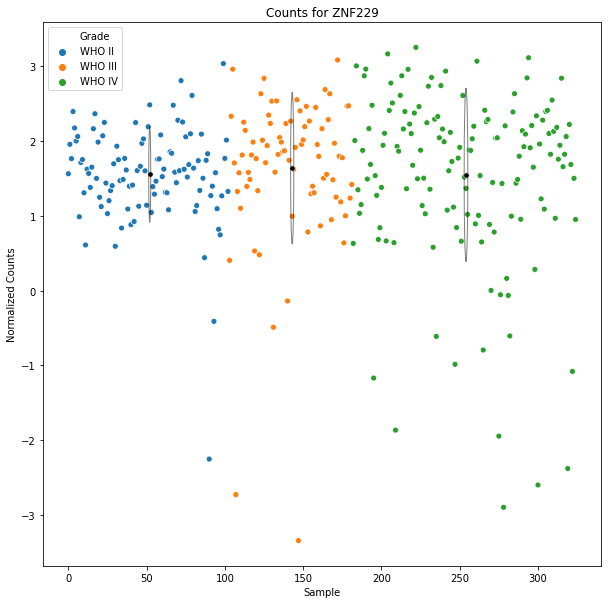

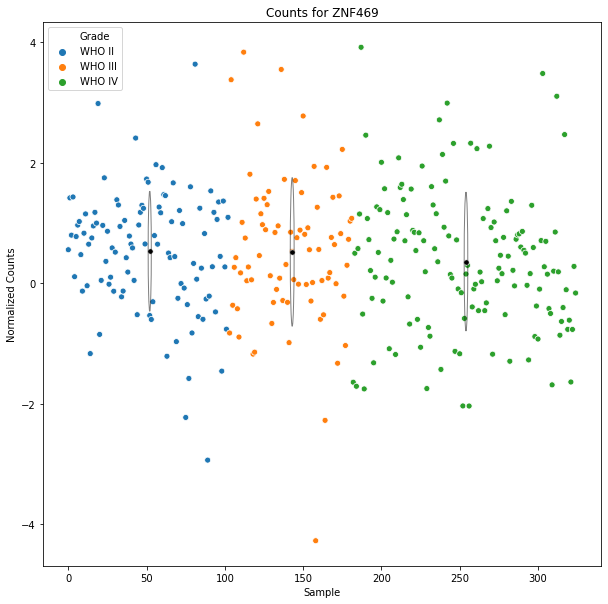

In [119]:
for i in important_genes:
    
    current_data = np.array(processed_data[i])
    x = np.arange(325)
    fig, ax = plt.subplots(figsize=(10,10))
    sb.scatterplot(x , current_data, hue = processed_data['Grade'],  
                  hue_order = ['WHO II', 'WHO III', 'WHO IV'])
    ax.add_patch( patches.Circle( xy = (52, means.loc['WHO II','{}'.format(i)]), 
                                  radius = std.loc['WHO II','{}'.format(i)], 
                                  facecolor = 'none', edgecolor = 'k', alpha = .5) )
    ax.add_patch( patches.Circle( xy = (143, means.loc['WHO III','{}'.format(i)]), 
                                  radius = std.loc['WHO III','{}'.format(i)], 
                                  facecolor = 'none', edgecolor = 'k', alpha = .5) )
    ax.add_patch( patches.Circle( xy = (254, means.loc['WHO IV','{}'.format(i)]), 
                                  radius = std.loc['WHO IV','{}'.format(i)], 
                                  facecolor = 'none', edgecolor = 'k', alpha = .5) )
    sb.scatterplot([52, 143, 254] , means['{}'.format(i)] , color = 'black', s = 30)
    ax.set_xlabel('Sample')
    ax.set_ylabel('Normalized Counts')
    ax.set_title(f'Counts for {i}')
    plt.show()

Genes which display obvious trends:
    - CASP4
    - CES4A
    - GS1-259H13.2
    - PIPOX
    - ZBTB16